In [1]:
import numpy as np
import keras

Using plaidml.keras.backend backend.


In [2]:
# pre download the data and transform

data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

# normalize the data: 0.0 to 1.0

x_train2 = x_train.astype('float32') / 255
x_test2 = x_test.astype('float32') / 255

# reshape
is_channels_first = (keras.backend.image_data_format() == 'channels_first')

if is_channels_first:
    x_train2 = xtrain2.reshape(x_train2.shape[0], 1  , x_train2.shape[2], x_train2.shape[2])
    x_test2 = x_test2.reshape(x_test2.shape[0], 1 , x_test2.shape[2] , x_test2.shape[2])
else:
    x_train2 = x_train2.reshape(x_train2.shape[0], x_train2.shape[2], x_train2.shape[2] , 1)
    x_test2 = x_test2.reshape(x_test2.shape[0], x_test2.shape[2] , x_test2.shape[2] , 1)

# hot encode
y_train2 = keras.utils.to_categorical(y_train)
y_test2 = keras.utils.to_categorical(y_test)

input_shape = x_train2.shape[1:]

In [3]:
print('x_train shape:', x_train2.shape)
print('y_train shape:', y_train2.shape)
print('x_test shape:', x_test2.shape)
print('y_test shape:', y_test2.shape)
print('input shape:', input_shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)
input shape: (28, 28, 1)


In [4]:
# setup model

model = keras.models.Sequential()
model.add( keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape , activation='relu' ))
model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add( keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu' ))
model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(512, activation='relu'))

model.add( keras.layers.Dropout(0.5))
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show summary
model.summary()

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [5]:
# train
#train the model with train data
fit_history = model.fit(x_train2, y_train2,
  epochs=10 ,
  batch_size=64,
  validation_data=(x_test2,y_test2)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 407us/step - loss: 0.1684 - acc: 0.9485 - val_loss: 0.0449 - val_acc: 0.9876
Epoch 2/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0572 - acc: 0.9821 - val_loss: 0.0375 - val_acc: 0.9873
Epoch 3/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0272 - val_acc: 0.9914
Epoch 4/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0329 - acc: 0.9899 - val_loss: 0.0297 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.0278 - acc: 0.9910 - val_loss: 0.0312 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0265 - val_acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.

In [6]:
# evaluate
print( model.evaluate(x_test2 , y_test2))

10000/10000 [==============================] - 4s 401us/step
[0.026234520840644836, 0.9935]


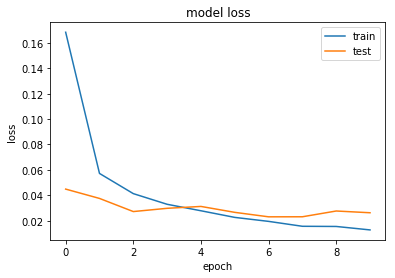

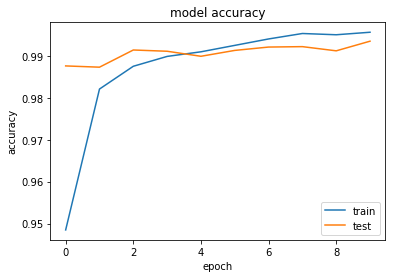

In [7]:
# show graph
%matplotlib inline
from matplotlib import pyplot as plt

# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.close()